In [ ]:
# !pip install qrcode

In [ ]:
# !pip install diffusers

In [1]:
import torch
import qrcode
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image
from dotenv import load_dotenv
load_dotenv()

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


True

In [2]:
controlnet = ControlNetModel.from_pretrained(
    "DionTimmer/controlnet_qrcode-control_v1p_sd15",
    torch_dtype = torch.float16
)

In [3]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet = controlnet,
    torch_dtype = torch.float16,
    safety_checker =None,
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

text_encoder\model.safetensors not found


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [4]:
def generate_qr_code(content:str):
    qr = qrcode.QRCode(
        version=1, 
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size = 16,
        border = 0,
    )
    
    qr.add_data(content)
    qr.make(fit=True)
    img = qr.make_image(fill_color = "black",back_color = "white")
    
    offset_min = 8*16
    w,h = img.size
    w = (w+255+offset_min)//256*256
    h = (h+255+offset_min)//256*256
    
    if w>1024:
        raise ValueError("QR Code is to big")
    
    bg = Image.new("L",(w,h),255)
    
    coords = ((w-img.size[0])//2//16*16,
              (h-img.size[1])//2//16*16
              )
    bg.paste(img, coords)
    return bg
    

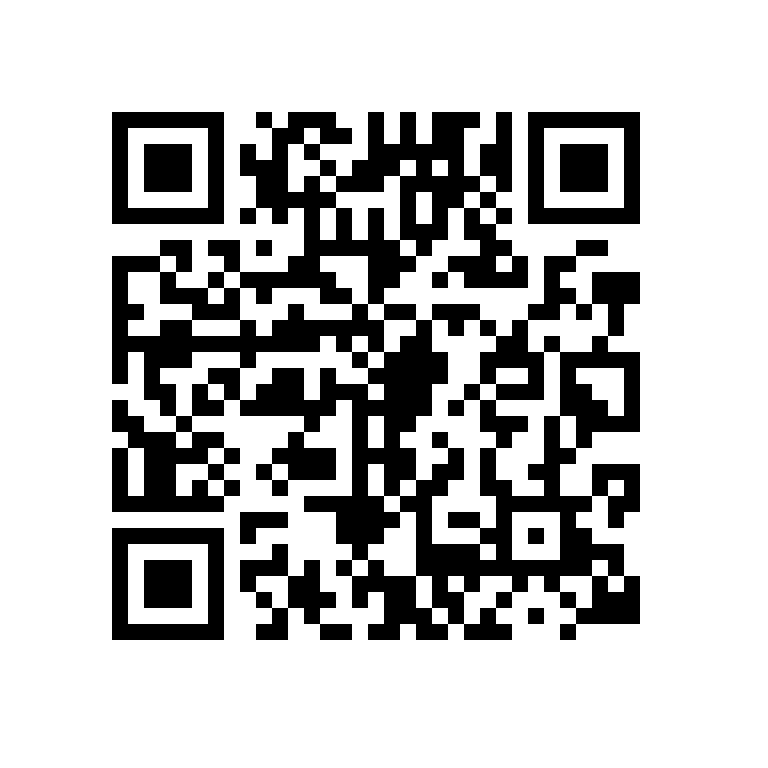

In [5]:
generate_qr_code("https://killerstrike17.github.io/")

  0%|          | 0/32 [00:00<?, ?it/s]

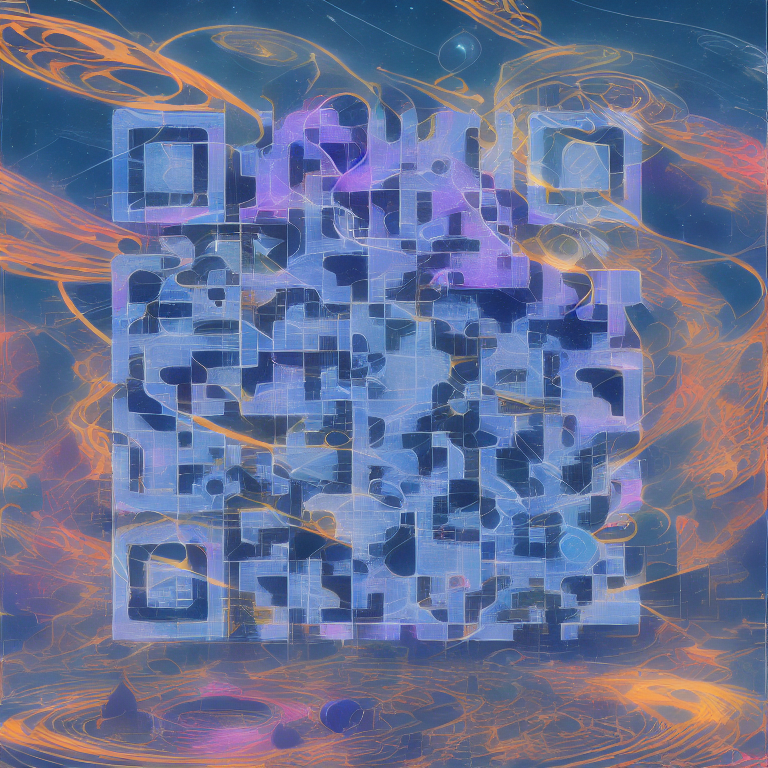

In [106]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "concept art, Complementary 'The Universe of Memory', award winning, at Dawn, Cel shading, Animecore, Direct light, geometric patterns, high quality, absurdres, masterpiece  <lora:add_detail:1>"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "(worst quality, low quality:1.4), child, loli, BadDream, aid291, an5, bad-artist, bad-artist-anime, bad-image-v2-39000, BadDream, badv4, EasyNegativeV2 FastNegativeEmbedding lr NegfeetV2 nobg notxt Unspeakable-Horrors-Composition-4v  verybadimagenegative_v1.3"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
generator = torch.Generator().manual_seed(2324230317)
# .initial_seed(2174793473)

output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=7,
    controlnet_conditioning_scale=1.8,
    generator=generator,
    num_inference_steps=32,
    # seed = 2174793473
    
)
output[0][0]

In [101]:
output[0][0].save("monster.png")

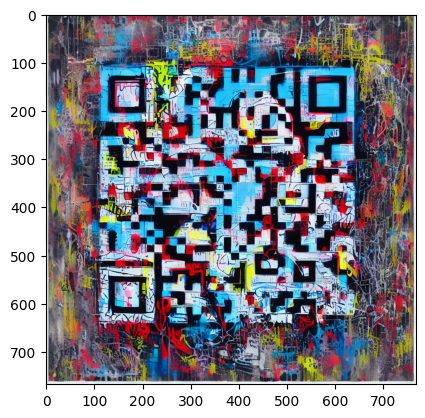

In [15]:
from matplotlib import pyplot as plt
plt.imshow(output[0][0])